# Global Phase

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `GlobalPhase`
Applies a global phase to the circuit as a whole.

The unitary effect is to multiply the state vector by the complex scalar
$e^{i pi t}$ for `exponent` $t$.

The global phase of a state or circuit does not affect any observable quantity, but
keeping track of it can be a useful bookkeeping mechanism for testing circuit identities.
The global phase becomes important if the gate becomes controlled.

#### Parameters
 - `exponent`: the exponent $t$ of the global phase $e^{i pi t}$ to apply.
 - `eps`: precision


In [2]:
from qualtran.bloqs.basic_gates import GlobalPhase

### Example Instances

In [3]:
global_phase = GlobalPhase(exponent=0.5)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([global_phase],
           ['`global_phase`'])

### Call Graph

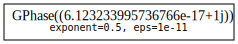

#### Counts totals:
 - `GPhase((6.123233995736766e-17+1j))`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
global_phase_g, global_phase_sigma = global_phase.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(global_phase_g)
show_counts_sigma(global_phase_sigma)

### Tensors and Controlled

The "tensor" of the global phase gate is just a number.

In [6]:
global_phase.tensor_contract()

(6.123233995736766e-17+1j)

When a global phase is controlled, it is equivalent to a ZPowGate

In [7]:
cgp = global_phase.controlled()
print(repr(cgp))
print(cgp.tensor_contract())

ZPowGate(exponent=0.5, global_shift=0.0, eps=1e-11)
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]
